Khushi Mehta
Roll no : 102303769
Subgroup : 3L3
Faculty : Dr. SC Raikwar

PDF Learning [NO2]

Problem Statement: This notebook implements a non-linear transformation of NO₂ concentration data and learns
the parameters of a probability density function.

Dataset Description

- Dataset: India Air Quality Dataset
- Source: Kaggle
- Feature Used: NO₂ concentration (no2)
- Total samples after cleaning: 419,509


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "shrutibhargava94/india-air-quality-data",
    "data.csv",
    pandas_kwargs={
        "encoding": "latin1"
    }
)

print(df.head())
print(df.columns)


Using Colab cache for faster access to the 'india-air-quality-data' dataset.
  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    

/usr/local/lib/python3.12/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


In [19]:
print(df.columns)

x = df["no2"].dropna().values  # missing values removed
print("Number of NO2 samples:", len(x))


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')
Number of NO2 samples: 419509


In [20]:
r = 102303769  # r is roll number
a_r = 0.05 * (r % 7)
b_r = 0.3 * (r % 5 + 1)

print("a_r = ", a_r)
print("b_r = ", b_r)

a_r =  0.05
b_r =  1.5


In [21]:
z = x + a_r * np.sin(b_r * x)
print("First 10 transformed values (z): ")
print(z[:10])

First 10 transformed values (z): 
[17.44116665  6.95601521 28.45283729 14.69705913  7.4516096  25.73759331
 17.12472497  8.72324977 23.00287437  8.93529275]


In [22]:
def pdf_model(z, lam, mu, c):
    return c * np.exp(-lam * (z - mu)**2)

In [23]:
mu_estimate = np.mean(z)
sigma2 = np.var(z)
lambda_estimate = 1 / (2 * sigma2)
c_estimate = np.sqrt(lambda_est / np.pi)

print("Final estimated mu:", mu_estimate)
print("Final estimated lambda:", lambda_estimate)
print("Final estimated c:", c_estimate)


Final estimated mu: 25.811311026855478
Final estimated lambda: 0.001460711615279084
Final estimated c: 0.021562906761539043


In [24]:
results_df = pd.DataFrame({
    "Parameter": ["mu (μ)", "lambda (λ)", "c"],
    "Estimated Value": [
        mu_estimate,
        lambda_estimate,
        c_estimate
    ]
})

results_df


,Parameter,Estimated Value
0,mu (μ),25.811311
1,lambda (λ),0.001461
2,c,0.021563


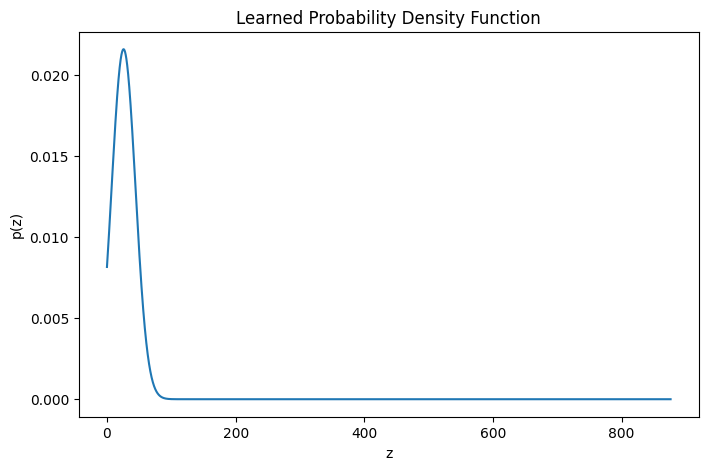

In [25]:
z_sorted = np.sort(z)

pdf_values = pdf_model(
    z_sorted,
    lambda_estimate,
    mu_estimate,
    c_estimate
)

plt.figure(figsize=(8,5))
plt.plot(z_sorted, pdf_values)
plt.xlabel("z")
plt.ylabel("p(z)")
plt.title("Learned Probability Density Function")
plt.show()
